In [126]:
import pandas as pd 
import numpy as np 
import data_clean_utility
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.pipeline import Pipeline 
from sklearn.compose import ColumnTransformer 
from sklearn.impute import SimpleImputer, KNNImputer, MissingIndicator
from sklearn.preprocessing import OneHotEncoder, StandardScaler,LabelEncoder, MinMaxScaler, PowerTransformer, OrdinalEncoder
from sklearn.model_selection import train_test_split

In [127]:
from sklearn import set_config

set_config(transform_output='pandas')

In [128]:
df = pd.read_csv('swiggy.csv')

In [129]:
data_clean_utility.perform_data_cleaning(df)

In [130]:
df = pd.read_csv("swiggy_cleaned.csv")

In [131]:
df.isnull().sum()

rider_id                   0
age                     1854
ratings                 1908
restaurant_latitude     3630
restaurant_longitude    3630
delivery_latitude       3630
delivery_longitude      3630
order_date                 0
weather                  525
traffic                  510
vehicle_condition          0
type_of_order              0
type_of_vehicle            0
multiple_deliveries      993
festival                 228
city_type               1198
time_taken                 0
city_name                  0
order_day                  0
order_month                0
order_day_of_week          0
is_weekend                 0
pickup_time_minutes     1640
order_time_hour         1640
order_time_of_day       2070
distance                3630
distance_type           3630
dtype: int64

In [132]:
columns_to_drop = ['rider_id',
                   'restaurant_latitude',
                   'restaurant_longitude',
                   'delivery_latitude',
                   'delivery_longitude',
                   'order_date',
                   'order_time_hour',
                   'order_day']

df.drop(columns= columns_to_drop , inplace = True)

df.columns

Index(['age', 'ratings', 'weather', 'traffic', 'vehicle_condition',
       'type_of_order', 'type_of_vehicle', 'multiple_deliveries', 'festival',
       'city_type', 'time_taken', 'city_name', 'order_month',
       'order_day_of_week', 'is_weekend', 'pickup_time_minutes',
       'order_time_of_day', 'distance', 'distance_type'],
      dtype='object')

In [133]:
df.shape

(45502, 19)

In [134]:
df.isna().sum()

age                    1854
ratings                1908
weather                 525
traffic                 510
vehicle_condition         0
type_of_order             0
type_of_vehicle           0
multiple_deliveries     993
festival                228
city_type              1198
time_taken                0
city_name                 0
order_month               0
order_day_of_week         0
is_weekend                0
pickup_time_minutes    1640
order_time_of_day      2070
distance               3630
distance_type          3630
dtype: int64

In [135]:
df.duplicated().sum()

np.int64(0)

In [136]:
import missingno as msno 

<Axes: >

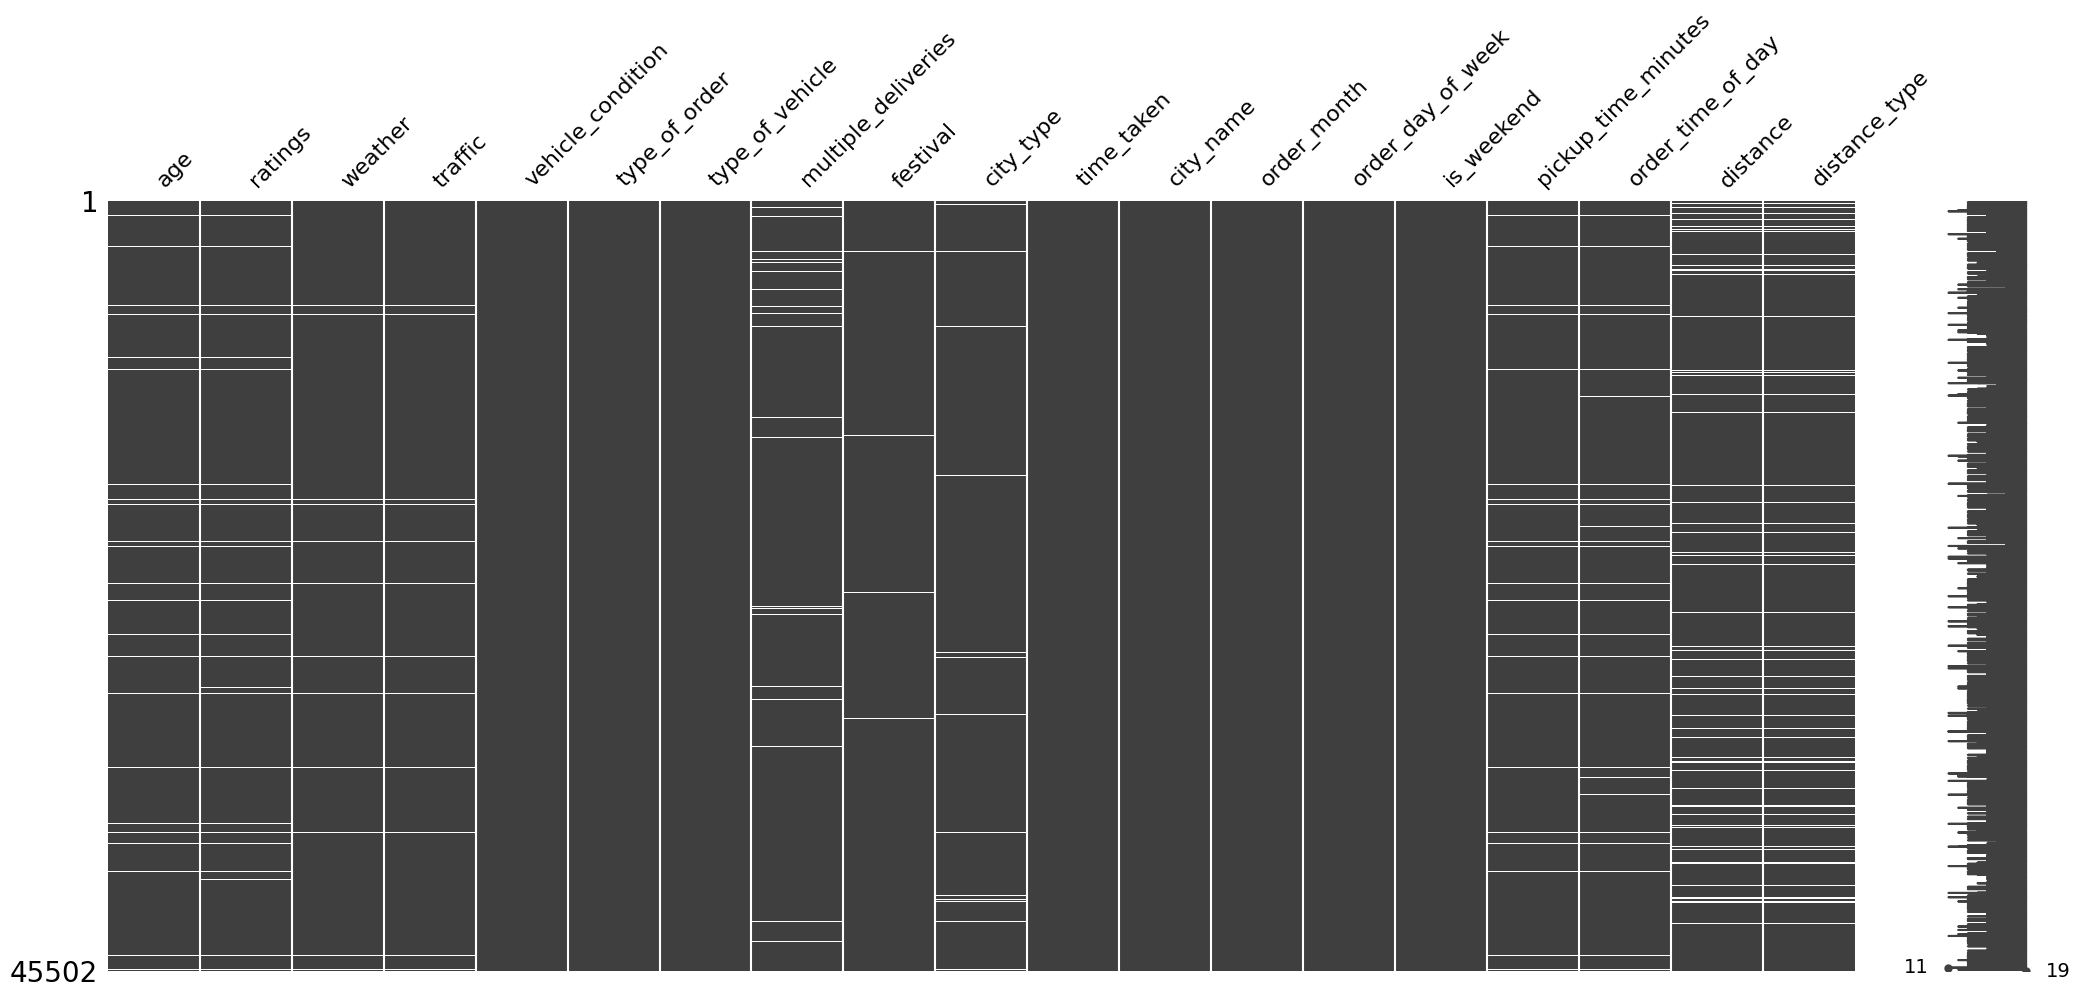

In [137]:
msno.matrix(df)

In [138]:
missing_cols = (
    df
    .isna()
    .any(axis = 0)
    .loc[lambda x : x]
    .index
)

missing_cols

Index(['age', 'ratings', 'weather', 'traffic', 'multiple_deliveries',
       'festival', 'city_type', 'pickup_time_minutes', 'order_time_of_day',
       'distance', 'distance_type'],
      dtype='object')

### Training model without imputation 

In [139]:
temp_df = df.copy().dropna()

In [140]:
temp_df.shape

(37695, 19)

In [141]:
X = temp_df.drop(columns= 'time_taken')
y = temp_df['time_taken']

In [142]:
X.isna().sum()

age                    0
ratings                0
weather                0
traffic                0
vehicle_condition      0
type_of_order          0
type_of_vehicle        0
multiple_deliveries    0
festival               0
city_type              0
city_name              0
order_month            0
order_day_of_week      0
is_weekend             0
pickup_time_minutes    0
order_time_of_day      0
distance               0
distance_type          0
dtype: int64

In [143]:
X.shape

(37695, 18)

In [144]:
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=42)

In [145]:
X_train.shape , X_test.shape 

((30156, 18), (7539, 18))

In [146]:
y_train.shape , y_test.shape

((30156,), (7539,))

In [147]:
y_train

8708     49
25198    31
34049    11
25987    24
37121    31
         ..
20239    30
7590     24
13610    15
1045     26
18968    28
Name: time_taken, Length: 30156, dtype: int64

In [148]:
X_train.head()


,age,ratings,weather,traffic,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city_type,city_name,order_month,order_day_of_week,is_weekend,pickup_time_minutes,order_time_of_day,distance,distance_type
8708,29.0,3.9,sunny,jam,0,drinks,motorcycle,2.0,no,semi-urban,COIMB,3,wednesday,0,15.0,night,9.348069,medium
25198,39.0,4.4,sandstorms,medium,0,meal,motorcycle,1.0,no,metropolitian,JAP,3,sunday,1,5.0,afternoon,4.469606,short
34049,29.0,4.5,sunny,high,1,buffet,motorcycle,0.0,no,urban,INDO,4,friday,0,10.0,morning,1.513073,short
25987,39.0,4.8,sandstorms,low,0,meal,motorcycle,1.0,no,metropolitian,KNP,2,saturday,1,15.0,night,10.445118,long
37121,30.0,4.4,windy,medium,1,buffet,scooter,1.0,no,metropolitian,MYS,3,saturday,1,10.0,afternoon,6.217834,medium


In [149]:
X_train.columns

Index(['age', 'ratings', 'weather', 'traffic', 'vehicle_condition',
       'type_of_order', 'type_of_vehicle', 'multiple_deliveries', 'festival',
       'city_type', 'city_name', 'order_month', 'order_day_of_week',
       'is_weekend', 'pickup_time_minutes', 'order_time_of_day', 'distance',
       'distance_type'],
      dtype='object')

In [150]:
num_cols = ['age', 'ratings', 'pickup_time_minutes', 'distance']

nominal_cat_cols = ['weather', 'type_of_order',
                    'type_of_vehicle',
                     'festival','city_type','city_name','order_month',
                     'order_day_of_week','is_weekend','order_time_of_day']

ordinal_cat_cols = ['traffic', 'distance_type']

In [151]:
for col in ordinal_cat_cols:
    print(col , X_train[col].unique())

traffic ['jam' 'medium' 'high' 'low']
distance_type ['medium' 'short' 'long' 'very_long']


In [152]:
traffic_order = ['low', 'medium', 'high', 'jam']

distance_type_order = ['short','medium', 'long', 'very_long']


In [153]:
preprocessor = ColumnTransformer(
    transformers= [
        ('scaling', MinMaxScaler(), num_cols),
        ('nominal_encode', OneHotEncoder(drop='first',handle_unknown='ignore',sparse_output = False), nominal_cat_cols),
        ('ordinal_encode', OrdinalEncoder(categories=[traffic_order, distance_type_order]),ordinal_cat_cols)
    ], remainder='passthrough', n_jobs=-1, verbose_feature_names_out=False,
    force_int_remainder_cols = False 
)

In [154]:
preprocessor.set_output(transform= "pandas")

ColumnTransformer(force_int_remainder_cols=False, n_jobs=-1,
                  remainder='passthrough',
                  transformers=[('scaling', MinMaxScaler(),
                                 ['age', 'ratings', 'pickup_time_minutes',
                                  'distance']),
                                ('nominal_encode',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore',
                                               sparse_output=False),
                                 ['weather', 'type_of_order', 'type_of_vehicle',
                                  'festival', 'city_type', 'city_name',
                                  'order_month', 'order_day_of_week',
                                  'is_weekend', 'order_time_of_day']),
                                ('ordinal_encode',
                                 OrdinalEncoder(categories=[['low', 'medium',
                                                             'high', 'jam'],
                                                            ['short', 'medium',
                                                             'long',
                                                             'very_long']]),
                                 ['traffic', 'distance_type'])],
                  verbose_feature_names_out=False)

In [155]:
X_train_processed = preprocessor.fit_transform(X_train)

X_test_processed = preprocessor.transform(X_test) 



In [156]:
X_train_processed.shape

(30156, 54)

In [157]:
X_test_processed.shape

(7539, 54)

In [158]:
pt = PowerTransformer()

y_train_transformed = pt.fit_transform(y_train.values.reshape(-1 , 1))

y_test_transformed = pt.transform(y_test.values.reshape(-1 , 1))

In [159]:
y_train_transformed

,x0
0,2.028672
1,0.554539
2,-2.024267
3,-0.173699
4,0.554539
...,...
30151,0.457580
30152,-0.173699
30153,-1.350937
30154,0.047111


In [160]:
y_test_transformed

,x0
0,0.047111
1,1.346753
2,0.833662
3,1.584393
4,1.097056
...,...
7534,1.181723
7535,-0.917684
7536,1.097056
7537,0.047111


In [161]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train_processed,y_train_transformed)


LinearRegression()

In [162]:
y_pred_train = model.predict(X_train_processed)

y_pred_test = model.predict(X_test_processed)

In [163]:
y_pred_train_org = pt.inverse_transform(y_pred_train.reshape(-1 , 1))

y_pred_test_org = pt.inverse_transform(y_pred_test.reshape(-1 , 1))

In [164]:
from sklearn.metrics import mean_absolute_error, r2_score

print(f"The train error is : {mean_absolute_error(y_train,y_pred_train_org)}")
print(f"The test error is : {mean_absolute_error(y_test, y_pred_test_org)}")

The train error is : 4.704988040436767
The test error is : 4.689856739959574


In [165]:
print(f"The train r2 score is {r2_score(y_train, y_pred_train_org)}")

print(f"The test r2 score is {r2_score(y_test , y_pred_test_org)}")

The train r2 score is 0.6009379360502916
The test r2 score is 0.5967797867335705


### Training baseline using imputed values 

In [166]:
temp_df = df.copy()

In [167]:
X = temp_df.drop(columns='time_taken')
y = temp_df['time_taken']

In [168]:
X.shape, y.shape

((45502, 18), (45502,))

In [169]:
X.isna().sum()

age                    1854
ratings                1908
weather                 525
traffic                 510
vehicle_condition         0
type_of_order             0
type_of_vehicle           0
multiple_deliveries     993
festival                228
city_type              1198
city_name                 0
order_month               0
order_day_of_week         0
is_weekend                0
pickup_time_minutes    1640
order_time_of_day      2070
distance               3630
distance_type          3630
dtype: int64

In [170]:
missing_cols = (
    temp_df
    .isna()
    .any(axis = 0)
    .loc[lambda x : x]
    .index
)

In [171]:
missing_cols

Index(['age', 'ratings', 'weather', 'traffic', 'multiple_deliveries',
       'festival', 'city_type', 'pickup_time_minutes', 'order_time_of_day',
       'distance', 'distance_type'],
      dtype='object')

In [172]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [173]:
X_train['age'].describe()

count    34931.000000
mean        29.569551
std          5.752869
min         20.000000
25%         25.000000
50%         30.000000
75%         35.000000
max         39.000000
Name: age, dtype: float64

In [174]:
X_train['age'].isna().sum()

np.int64(1470)

In [175]:
age_median = X_train.loc[: , 'age'].median()

<Axes: xlabel='age', ylabel='Density'>

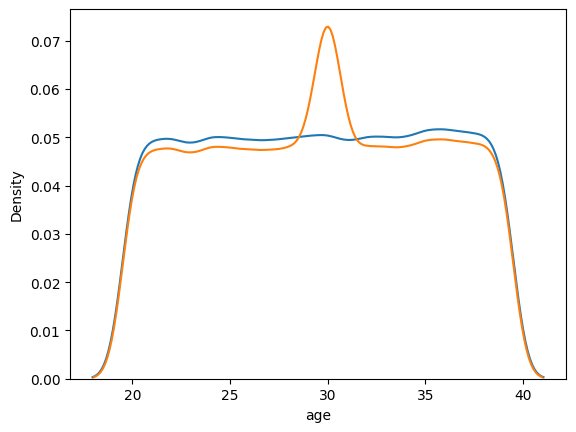

In [176]:
sns.kdeplot(data = temp_df, x = 'age', label = 'original')

sns.kdeplot(data = temp_df['age'].fillna(age_median), label='imputed')

1. Distribution is changed 
2. use advance imputation technique

In [177]:
X_train.columns

Index(['age', 'ratings', 'weather', 'traffic', 'vehicle_condition',
       'type_of_order', 'type_of_vehicle', 'multiple_deliveries', 'festival',
       'city_type', 'city_name', 'order_month', 'order_day_of_week',
       'is_weekend', 'pickup_time_minutes', 'order_time_of_day', 'distance',
       'distance_type'],
      dtype='object')

In [178]:
X_train['ratings'].describe()

count    34891.000000
mean         4.635058
std          0.314049
min          2.500000
25%          4.500000
50%          4.700000
75%          4.900000
max          5.000000
Name: ratings, dtype: float64

In [179]:
X_train['ratings'].isna().sum()

np.int64(1510)

In [180]:
ratings_mean = X_train['ratings'].mean()
ratings_mean

np.float64(4.635057751282567)

<Axes: xlabel='ratings', ylabel='Density'>

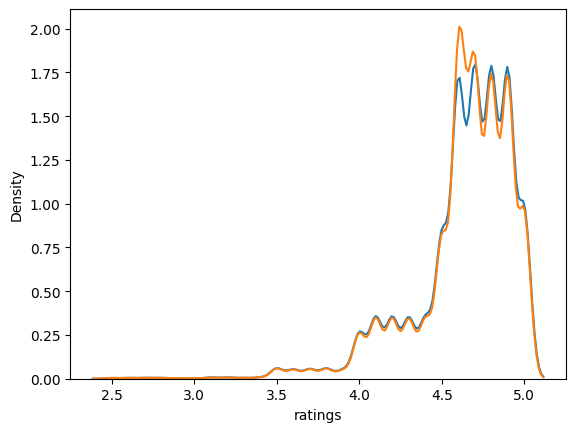

In [181]:
sns.kdeplot(data = X_train['ratings'], label = 'original')

sns.kdeplot(data = X_train['ratings'].fillna(ratings_mean), label = 'imputed')

<Axes: xlabel='ratings', ylabel='Count'>

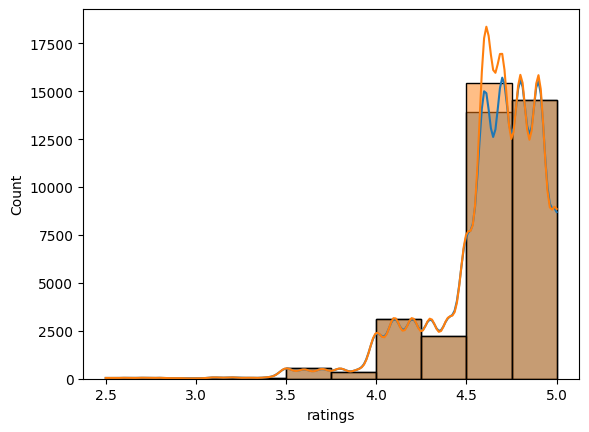

In [182]:
sns.histplot(data = X_train['ratings'],kde = True, label = 'original',bins=10)

sns.histplot(data = X_train['ratings'].fillna(ratings_mean), kde=True, label = 'imputed',bins = 10)

In [183]:
X_train['weather'].isnull().sum()

np.int64(421)

In [184]:
X_train['weather'].describe()

count     35980
unique        6
top         fog
freq       6160
Name: weather, dtype: object

In [185]:
X_train['weather'].value_counts()

weather
fog           6160
stormy        6051
cloudy        6033
sandstorms    5958
windy         5928
sunny         5850
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='weather'>

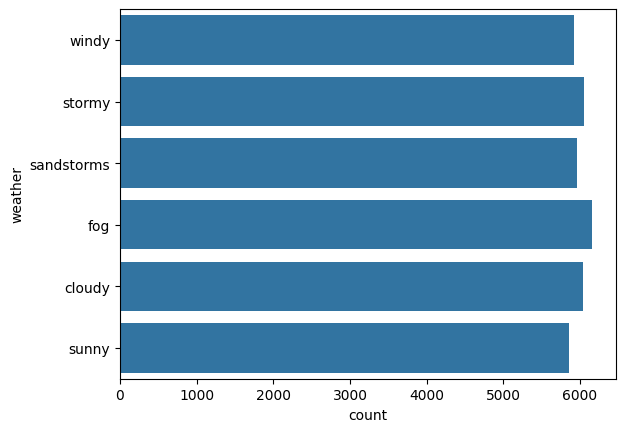

In [186]:
sns.countplot(data = X_train['weather'])

1. using mode it will change the distribution of the data , hence use advance imputation technique

In [187]:
missing_weather = MissingIndicator()
missing_weather.set_output(transform = 'pandas')

pd.concat([X_train['weather'], missing_weather.fit_transform(X_train[['weather']])],axis = 1)


,weather,missingindicator_weather
11029,windy,False
15665,windy,False
14475,stormy,False
29199,windy,False
22514,sandstorms,False
...,...,...
11284,sandstorms,False
44732,cloudy,False
38158,fog,False
860,windy,False


In [188]:
X_train.columns

Index(['age', 'ratings', 'weather', 'traffic', 'vehicle_condition',
       'type_of_order', 'type_of_vehicle', 'multiple_deliveries', 'festival',
       'city_type', 'city_name', 'order_month', 'order_day_of_week',
       'is_weekend', 'pickup_time_minutes', 'order_time_of_day', 'distance',
       'distance_type'],
      dtype='object')

In [189]:
X_train['traffic'].value_counts()

traffic
low       12323
jam       11320
medium     8773
high       3578
Name: count, dtype: int64

In [190]:
X_train['traffic'].isna().sum()

np.int64(407)

<Axes: xlabel='count', ylabel='traffic'>

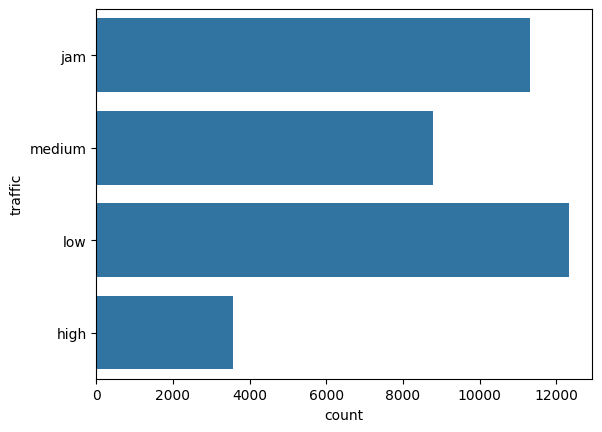

In [191]:
sns.countplot(data = X_train['traffic'])

In [192]:
missing_cols

Index(['age', 'ratings', 'weather', 'traffic', 'multiple_deliveries',
       'festival', 'city_type', 'pickup_time_minutes', 'order_time_of_day',
       'distance', 'distance_type'],
      dtype='object')

In [193]:
X_train['multiple_deliveries'].value_counts()

multiple_deliveries
1.0    22487
0.0    11252
2.0     1599
3.0      268
Name: count, dtype: int64

In [194]:
X_train.multiple_deliveries.isna().sum()

np.int64(795)

<Axes: xlabel='count', ylabel='multiple_deliveries'>

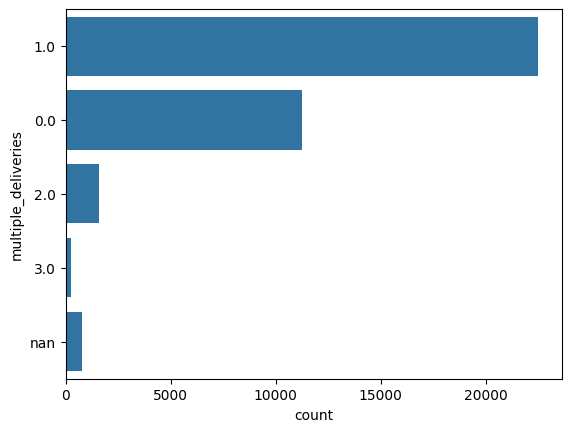

In [195]:
sns.countplot(data=X_train['multiple_deliveries'].apply(str))

In [196]:
multiple_deliveries_mode = X_train['multiple_deliveries'].mode()[0]

In [197]:
X_train['festival'].value_counts()

festival
no     35474
yes      739
Name: count, dtype: int64

In [198]:
X_train['festival'].isna().sum()

np.int64(188)

In [199]:
festival_mode = X_train['festival'].mode()[0]
festival_mode

'no'

<Axes: xlabel='count', ylabel='festival'>

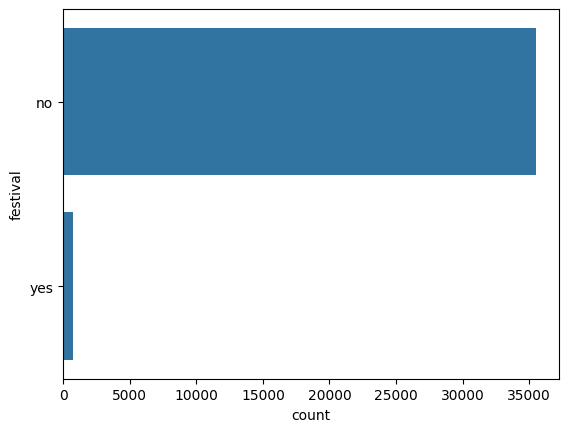

In [200]:
sns.countplot(data = X_train['festival'])

In [201]:
missing_cols

Index(['age', 'ratings', 'weather', 'traffic', 'multiple_deliveries',
       'festival', 'city_type', 'pickup_time_minutes', 'order_time_of_day',
       'distance', 'distance_type'],
      dtype='object')

In [202]:
X_train['city_type'].isnull().sum()

np.int64(968)

In [203]:
X_train['city_type'].value_counts()

city_type
metropolitian    27245
urban             8058
semi-urban         130
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='city_type'>

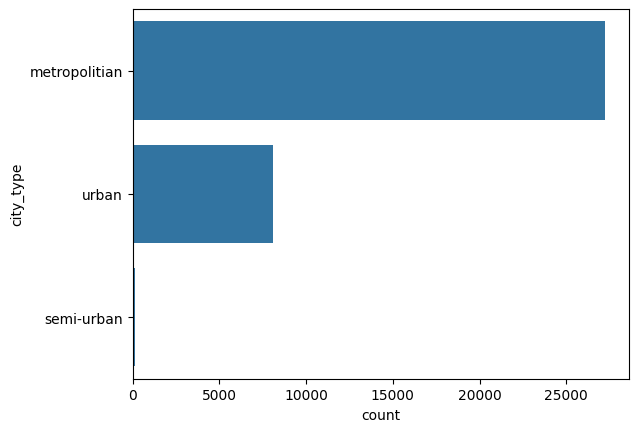

In [204]:
sns.countplot(data = X_train['city_type'])

In [205]:
city_type_mode = X_train.loc[: , 'city_type'].mode()[0]

In [206]:
city_type_mode

'metropolitian'

In [207]:
missing_cols

Index(['age', 'ratings', 'weather', 'traffic', 'multiple_deliveries',
       'festival', 'city_type', 'pickup_time_minutes', 'order_time_of_day',
       'distance', 'distance_type'],
      dtype='object')

In [208]:
X_train['pickup_time_minutes'].dtype

dtype('float64')

In [209]:
X_train['pickup_time_minutes'].isna().sum()

np.int64(1298)

In [210]:
X_train['pickup_time_minutes'].describe()

count    35103.000000
mean         9.998718
std          4.082279
min          5.000000
25%          5.000000
50%         10.000000
75%         15.000000
max         15.000000
Name: pickup_time_minutes, dtype: float64

In [211]:
pickup_time_minutes_median = X_train['pickup_time_minutes'].median()
pickup_time_minutes_median

np.float64(10.0)

<Axes: xlabel='pickup_time_minutes', ylabel='Count'>

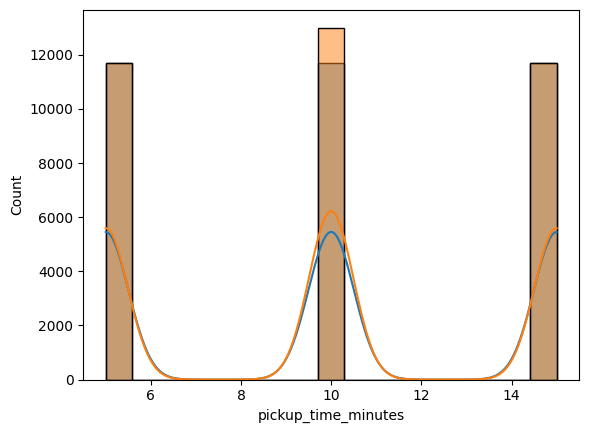

In [212]:
sns.histplot(data=X_train['pickup_time_minutes'],label = 'original', kde = True)
sns.histplot(data = X_train['pickup_time_minutes'].fillna(pickup_time_minutes_median),label = 'imputed', kde = True)

In [213]:
X_train['order_time_of_day'].value_counts()

order_time_of_day
night        10994
evening      10906
morning       6883
afternoon     5972
Name: count, dtype: int64

In [214]:
X_train['order_time_of_day'].isna().sum()

np.int64(1646)

<Axes: xlabel='count', ylabel='order_time_of_day'>

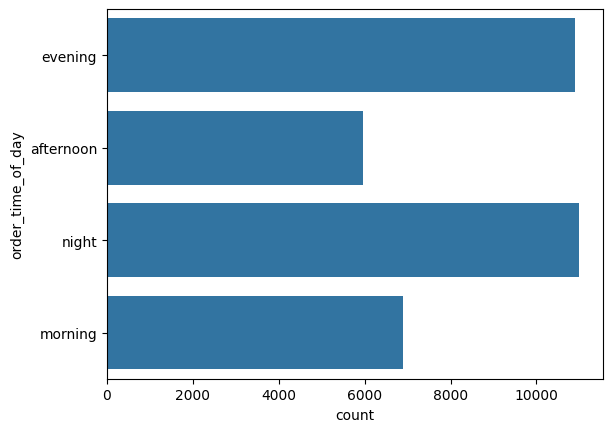

In [215]:
sns.countplot(X_train['order_time_of_day'])

In [216]:
missing_cols

Index(['age', 'ratings', 'weather', 'traffic', 'multiple_deliveries',
       'festival', 'city_type', 'pickup_time_minutes', 'order_time_of_day',
       'distance', 'distance_type'],
      dtype='object')

In [217]:
X_train['distance'].describe()

count    33470.000000
mean         9.738154
std          5.608401
min          1.465067
25%          4.657672
50%          9.193421
75%         13.681057
max         20.969489
Name: distance, dtype: float64

In [218]:
X_train['distance'].isnull().sum()

np.int64(2931)

In [219]:
distance_median = X_train['distance'].median()
distance_median

np.float64(9.19342145967692)

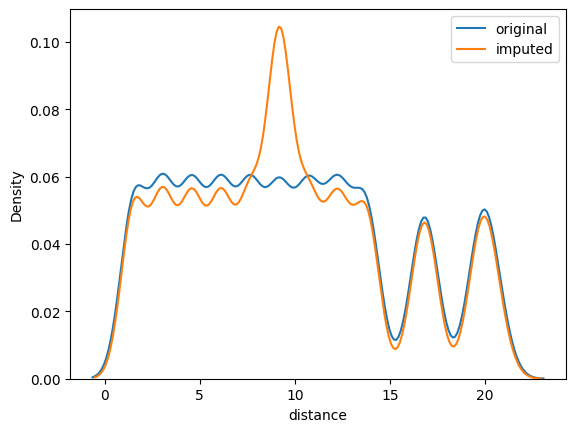

In [220]:
sns.kdeplot(data = X_train['distance'], label ='original')
sns.kdeplot(data = X_train['distance'].fillna(distance_median), label = 'imputed')
plt.legend()

In [221]:
X_train['distance_type'].value_counts()

distance_type
long         9025
short        8998
medium       8993
very_long    6454
Name: count, dtype: int64

In [222]:
X_train['distance_type'].isnull().sum()

np.int64(2931)

<Axes: xlabel='count', ylabel='distance_type'>

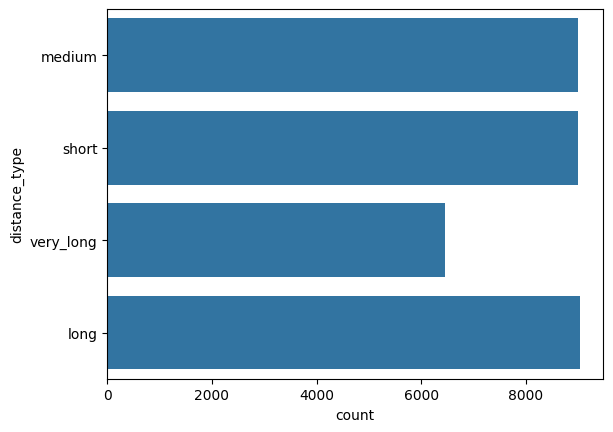

In [223]:
sns.countplot(data = X_train['distance_type'])

### imputation pipeline

In [224]:
nominal_cat_cols

['weather',
 'type_of_order',
 'type_of_vehicle',
 'festival',
 'city_type',
 'city_name',
 'order_month',
 'order_day_of_week',
 'is_weekend',
 'order_time_of_day']

In [225]:
X_train.isna().sum()

age                    1470
ratings                1510
weather                 421
traffic                 407
vehicle_condition         0
type_of_order             0
type_of_vehicle           0
multiple_deliveries     795
festival                188
city_type               968
city_name                 0
order_month               0
order_day_of_week         0
is_weekend                0
pickup_time_minutes    1298
order_time_of_day      1646
distance               2931
distance_type          2931
dtype: int64

Imputing nominal categorical values 

In [226]:
features_to_fill_mode = ['multiple_deliveries', 'festival', 'city_type']

features_to_fill_missing = [col for col in nominal_cat_cols if col not in features_to_fill_mode]

features_to_fill_missing

['weather',
 'type_of_order',
 'type_of_vehicle',
 'city_name',
 'order_month',
 'order_day_of_week',
 'is_weekend',
 'order_time_of_day']

In [286]:
simple_imputer = ColumnTransformer(transformers=[
    ("mode_imputer", SimpleImputer(strategy='most_frequent'), features_to_fill_mode),
    ("missing_imputer", SimpleImputer(strategy="constant", fill_value= 'missing'), features_to_fill_missing)
], remainder= "passthrough", n_jobs=-1, force_int_remainder_cols = False ,
verbose_feature_names_out=False 
)

simple_imputer

ColumnTransformer(force_int_remainder_cols=False, n_jobs=-1,
                  remainder='passthrough',
                  transformers=[('mode_imputer',
                                 SimpleImputer(strategy='most_frequent'),
                                 ['multiple_deliveries', 'festival',
                                  'city_type']),
                                ('missing_imputer',
                                 SimpleImputer(fill_value='missing',
                                               strategy='constant'),
                                 ['weather', 'type_of_order', 'type_of_vehicle',
                                  'city_name', 'order_month',
                                  'order_day_of_week', 'is_weekend',
                                  'order_time_of_day'])],
                  verbose_feature_names_out=False)

In [285]:
simple_imputer.fit_transform(X_train).isna().sum()

multiple_deliveries       0
festival                  0
city_type                 0
weather                   0
type_of_order             0
type_of_vehicle           0
city_name                 0
order_month               0
order_day_of_week         0
is_weekend                0
order_time_of_day         0
age                    1470
ratings                1510
traffic                 407
vehicle_condition         0
pickup_time_minutes    1298
distance               2931
distance_type          2931
dtype: int64

In [ ]:
ordinal_cat_cols, num_cols

(['traffic', 'distance_type'],
 ['age', 'ratings', 'pickup_time_minutes', 'distance'])

In [230]:
knn_imputer = KNNImputer(n_neighbors= 5)

In [231]:
print(num_cols)

print(nominal_cat_cols)

print(ordinal_cat_cols)


['age', 'ratings', 'pickup_time_minutes', 'distance']
['weather', 'type_of_order', 'type_of_vehicle', 'festival', 'city_type', 'city_name', 'order_month', 'order_day_of_week', 'is_weekend', 'order_time_of_day']
['traffic', 'distance_type']


In [233]:
# order for ordinal encoding 

traffic_order , distance_type_order

(['low', 'medium', 'high', 'jam'], ['short', 'medium', 'long', 'very_long'])

In [287]:
preprocessor = ColumnTransformer(transformers=[

    ('nominal_encode', OneHotEncoder(drop = 'first', handle_unknown='ignore', sparse_output=False), nominal_cat_cols),
    ('ordinal_encode', OrdinalEncoder(categories=[traffic_order,distance_type_order],
                                      encoded_missing_value=-999,
                                      handle_unknown="use_encoded_value",unknown_value =- 1 ),
                                        ordinal_cat_cols) ,
    # ('scale_num', StandardScaler(), num_cols) 
], remainder= "passthrough", n_jobs=-1, force_int_remainder_cols = False , verbose_feature_names_out=False)

preprocessor

ColumnTransformer(force_int_remainder_cols=False, n_jobs=-1,
                  remainder='passthrough',
                  transformers=[('nominal_encode',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore',
                                               sparse_output=False),
                                 ['weather', 'type_of_order', 'type_of_vehicle',
                                  'festival', 'city_type', 'city_name',
                                  'order_month', 'order_day_of_week',
                                  'is_weekend', 'order_time_of_day']),
                                ('ordinal_encode',
                                 OrdinalEncoder(categories=[['low', 'medium',
                                                             'high', 'jam'],
                                                            ['short', 'medium',
                                                             'long',
                                                             'very_long']],
                                                encoded_missing_value=-999,
                                                handle_unknown='use_encoded_value',
                                                unknown_value=-1),
                                 ['traffic', 'distance_type'])],
                  verbose_feature_names_out=False)

In [268]:
preprocessor.fit_transform(X_train).isna().sum().loc[lambda ser:ser.ge(1)]

age                    1470
ratings                1510
multiple_deliveries     795
pickup_time_minutes    1298
distance               2931
dtype: int64

In [288]:
preprocessing_pipeline = Pipeline(steps = [
    ('simple_imputer', simple_imputer),
    ('preprocess' , preprocessor),
    ('knn_imputer', knn_imputer)
])

preprocessing_pipeline

Pipeline(steps=[('simple_imputer',
                 ColumnTransformer(force_int_remainder_cols=False, n_jobs=-1,
                                   remainder='passthrough',
                                   transformers=[('mode_imputer',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['multiple_deliveries',
                                                   'festival', 'city_type']),
                                                 ('missing_imputer',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant'),
                                                  ['weather', 'type_of_order',
                                                   'type_of_vehi...
                                                   'city_name', 'order_month',
                                                   'order_day_of_week',
                                                   'is_weekend',
                                                   'order_time_of_day']),
                                                 ('ordinal_encode',
                                                  OrdinalEncoder(categories=[['low',
                                                                              'medium',
                                                                              'high',
                                                                              'jam'],
                                                                             ['short',
                                                                              'medium',
                                                                              'long',
                                                                              'very_long']],
                                                                 encoded_missing_value=-999,
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['traffic',
                                                   'distance_type'])],
                                   verbose_feature_names_out=False)),
                ('knn_imputer', KNNImputer())])

In [270]:
preprocessing_pipeline.fit_transform(X_train)

,weather_fog,weather_missing,weather_sandstorms,weather_stormy,weather_sunny,weather_windy,type_of_order_drinks,type_of_order_meal,type_of_order_snack,type_of_vehicle_electric_scooter,...,order_time_of_day_morning,order_time_of_day_night,traffic,distance_type,multiple_deliveries,age,ratings,vehicle_condition,pickup_time_minutes,distance
11029,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,3.0,1.0,1.0,26.0,4.70,2.0,10.0,9.177684
15665,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,21.0,4.90,2.0,5.0,6.081536
14475,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,31.2,4.66,2.0,8.0,1.554563
29199,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,3.0,1.0,32.0,4.70,0.0,15.0,20.852271
22514,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,3.0,1.0,0.0,34.0,4.90,1.0,5.0,9.056096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,3.0,2.0,0.0,29.0,4.70,2.0,5.0,12.464367
44732,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,36.0,4.80,0.0,10.0,1.520432
38158,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,-1.0,0.0,36.0,4.40,1.0,10.0,4.508633
860,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,25.0,4.90,2.0,5.0,7.760938


In [271]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

model_pipe = Pipeline(steps = [
    ('preprocessing', preprocessing_pipeline),
    ('model', lr)
]
)

model_pipe

Pipeline(steps=[('preprocessing',
                 Pipeline(steps=[('simple_imputer',
                                  ColumnTransformer(force_int_remainder_cols=False,
                                                    n_jobs=-1,
                                                    remainder='passthrough',
                                                    transformers=[('mode_imputer',
                                                                   SimpleImputer(strategy='most_frequent'),
                                                                   ['multiple_deliveries',
                                                                    'festival',
                                                                    'city_type']),
                                                                  ('missing_imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant'),
                                                                   ['weath...
                                                                    'is_weekend',
                                                                    'order_time_of_day']),
                                                                  ('ordinal_encode',
                                                                   OrdinalEncoder(categories=[['low',
                                                                                               'medium',
                                                                                               'high',
                                                                                               'jam'],
                                                                                              ['short',
                                                                                               'medium',
                                                                                               'long',
                                                                                               'very_long']],
                                                                                  encoded_missing_value=-999,
                                                                                  handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1),
                                                                   ['traffic',
                                                                    'distance_type'])],
                                                    verbose_feature_names_out=False)),
                                 ('knn_imputer', KNNImputer())])),
                ('model', LinearRegression())])

In [272]:
pt = PowerTransformer()

y_train_pt = pt.fit_transform(y_train.values.reshape(-1 , 1))

y_test_pt = pt.transform(y_test.values.reshape(-1 , 1))

In [273]:
y_train_pt.shape

(36401, 1)

In [274]:
y_test_pt.shape

(9101, 1)

In [275]:
model_pipe.fit(X_train , y_train_pt)

Pipeline(steps=[('preprocessing',
                 Pipeline(steps=[('simple_imputer',
                                  ColumnTransformer(force_int_remainder_cols=False,
                                                    n_jobs=-1,
                                                    remainder='passthrough',
                                                    transformers=[('mode_imputer',
                                                                   SimpleImputer(strategy='most_frequent'),
                                                                   ['multiple_deliveries',
                                                                    'festival',
                                                                    'city_type']),
                                                                  ('missing_imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant'),
                                                                   ['weath...
                                                                    'is_weekend',
                                                                    'order_time_of_day']),
                                                                  ('ordinal_encode',
                                                                   OrdinalEncoder(categories=[['low',
                                                                                               'medium',
                                                                                               'high',
                                                                                               'jam'],
                                                                                              ['short',
                                                                                               'medium',
                                                                                               'long',
                                                                                               'very_long']],
                                                                                  encoded_missing_value=-999,
                                                                                  handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1),
                                                                   ['traffic',
                                                                    'distance_type'])],
                                                    verbose_feature_names_out=False)),
                                 ('knn_imputer', KNNImputer())])),
                ('model', LinearRegression())])

In [276]:
y_pred_train = model_pipe.predict(X_train)

y_pred_test = model_pipe.predict(X_test)

In [277]:
y_pred_train_org = pt.inverse_transform(y_pred_train.reshape(-1 , 1))

y_pred_test_org = pt.inverse_transform(y_pred_test.reshape(-1 , 1))

In [278]:
from sklearn.metrics import mean_absolute_error, r2_score

print(mean_absolute_error(y_train,y_pred_train_org))

print(mean_absolute_error(y_test, y_pred_test_org))

4.831833103029396
4.861312623000181


In [279]:
print(r2_score(y_train , y_pred_train_org))

print(r2_score(y_test , y_pred_test_org))

0.5796175376802488
0.574611980843396


In [291]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42 , n_jobs=-1)

model_pipe = Pipeline(
    steps = [
        ('preprocessing' , preprocessing_pipeline),
        ('model', rf)
    ]
)

model_pipe

Pipeline(steps=[('preprocessing',
                 Pipeline(steps=[('simple_imputer',
                                  ColumnTransformer(force_int_remainder_cols=False,
                                                    n_jobs=-1,
                                                    remainder='passthrough',
                                                    transformers=[('mode_imputer',
                                                                   SimpleImputer(strategy='most_frequent'),
                                                                   ['multiple_deliveries',
                                                                    'festival',
                                                                    'city_type']),
                                                                  ('missing_imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant'),
                                                                   ['weath...
                                                                  ('ordinal_encode',
                                                                   OrdinalEncoder(categories=[['low',
                                                                                               'medium',
                                                                                               'high',
                                                                                               'jam'],
                                                                                              ['short',
                                                                                               'medium',
                                                                                               'long',
                                                                                               'very_long']],
                                                                                  encoded_missing_value=-999,
                                                                                  handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1),
                                                                   ['traffic',
                                                                    'distance_type'])],
                                                    verbose_feature_names_out=False)),
                                 ('knn_imputer', KNNImputer())])),
                ('model', RandomForestRegressor(n_jobs=-1, random_state=42))])

In [292]:
model_pipe.fit(X_train,y_train_pt.values.ravel())

Pipeline(steps=[('preprocessing',
                 Pipeline(steps=[('simple_imputer',
                                  ColumnTransformer(force_int_remainder_cols=False,
                                                    n_jobs=-1,
                                                    remainder='passthrough',
                                                    transformers=[('mode_imputer',
                                                                   SimpleImputer(strategy='most_frequent'),
                                                                   ['multiple_deliveries',
                                                                    'festival',
                                                                    'city_type']),
                                                                  ('missing_imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant'),
                                                                   ['weath...
                                                                  ('ordinal_encode',
                                                                   OrdinalEncoder(categories=[['low',
                                                                                               'medium',
                                                                                               'high',
                                                                                               'jam'],
                                                                                              ['short',
                                                                                               'medium',
                                                                                               'long',
                                                                                               'very_long']],
                                                                                  encoded_missing_value=-999,
                                                                                  handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1),
                                                                   ['traffic',
                                                                    'distance_type'])],
                                                    verbose_feature_names_out=False)),
                                 ('knn_imputer', KNNImputer())])),
                ('model', RandomForestRegressor(n_jobs=-1, random_state=42))])

In [293]:
y_pred_train = model_pipe.predict(X_train)

y_pred_test = model_pipe.predict(X_test)

In [294]:
y_pred_train_org = pt.inverse_transform(y_pred_train.reshape(-1 , 1))

y_pred_test_org = pt.inverse_transform(y_pred_test.reshape(-1 , 1))

In [296]:
print(r2_score(y_train, y_pred_train_org))

print(r2_score(y_test, y_pred_test_org))

0.9714827150689163
0.7988679232683541
